In [1]:
# Load modules
import matplotlib.pyplot as plt
import numpy as np
import sys
from pathlib import Path
import matplotlib.dates as mdates
import psyplot.project as psy

from iconarray.plot import formatoptions # import plotting formatoptions (for use with psyplot)
import iconarray as iconvis # import self-written modules from iconarray

In [2]:
# Get example datasets for testing
iconvis.get_example_data()

('/', 'scratch-shared', 'meteoswiss', 'scratch', 'vcherkas', 'icon-vis', 'timeseries')
 
Getting data from folder: grib
 
Getting data from folder: grids
 
Getting data from folder: nc


In [3]:
# Read in nc file

# If the nc file is missing grid information (no variables clon_bnds and clat_bnds),
# the information needs to be added with a grid file.
# The module "grid" contains a function to check if the grid information is available and a function to add it.

# Enter the path to your nc file or use one of the example datasets:
nc_file = '../data/example_data/nc/lfff01000000.nc'
nc_file = '../data/example_data/nc/my_exp1_atm_3d_ml_20180921T000000Z.nc'
# If necessary, add the corresponding grid file:
grid_file = '../data/example_data/grids/ICON-1E_DOM01.nc'

if iconvis.check_grid_information(nc_file):
    print('The grid information is available')
    data = psy.open_dataset(nc_file)
else:
    print('The grid information is not available')
    data = iconvis.add_grid_information(nc_file,grid_file) # if add_grid_information fails, import and use combine_grid_information

The grid information is available


In [4]:
# Check which variables are available
for var in data.variables:
    print(var)

clon
clon_bnds
clat
clat_bnds
elon
elon_bnds
elat
elat_bnds
height
height_bnds
height_2
height_3
depth
depth_2
depth_2_bnds
depth_3
depth_3_bnds
height_4
depth_4
depth_4_bnds
time
u
v
vt
qc
qi
qr
qs
qv
rho
theta_v
tke
vn
w
ddt_vn_phy
ddt_exner_phy
ddt_temp_dyn
exner_pr
exner_dyn_incr
pres_sfc
ddt_pres_sfc
temp
tempv
temp_ifc
pres
pres_ifc
dpres_mc
omega
div
div_ic
hdef_ic
dwdx
dwdy
vor
mass_fl_e
rho_ic
w_concorr_c
theta_v_ic
vn_ie
tqv
tqc
tqi
tqr
tqs
rain_gsp_rate
rain_gsp
tot_prec
cape
cape_ml
cin_ml
gust10
dyn_gust
clct_mod
cldepth
tot_qv_dia
tot_qc_dia
tot_qi_dia
tqv_dia
tqc_dia
tqi_dia
avg_qv
avg_qc
avg_qi
tsfctrad
thbclr_s
thb_t
thb_s
thu_s
lwflxall
t_s
t_sk
t_so
runoff_s
lwflx_up
lwflx_dn
lwflx_up_clr
lwflx_dn_clr
shfl_s
lhfl_s
lhfl_bs
lhfl_pl
qhfl_s
qcfl_s
t_2m
qv_2m
rh_2m
td_2m
u_10m
v_10m
sp_10m
umfl_s
vmfl_s
str_u_sso
str_v_sso
drag_u_grid
ddt_temp_radlw
ddt_temp_turb
ddt_temp_drag
ddt_temp_pconv
ddt_u_turb
ddt_u_sso
ddt_u_pconv
ddt_v_turb
ddt_v_sso
ddt_qv_turb
ddt_qc_turb
dd

In [5]:
# Load data
var_name = 'u'
var_field = getattr(data,var_name)
values = var_field.values
if 'height' in var_field.dims[1]: 
        height = 0 # specify height index
        var = values[:,height,:]
else:
    var = values
time = data.time.values[:]

In [6]:
# Get mean over whole map
var_mean = var.mean(axis=1)

In [7]:
# Get values of grid cell closest to coordinate
# E.g. Zürich:
lon = 8.54
lat = 47.38
lats = np.rad2deg(data.clat.values[:])
lons = np.rad2deg(data.clon.values[:])
ind = iconvis.ind_from_latlon(lats,lons,lat,lon,verbose=True)
var_coord = var[:,ind]

Closest ind: 3352
 Given lat: 47.380 vs found lat: 47.372
 Given lon: 8.540 vs found lon: 8.527


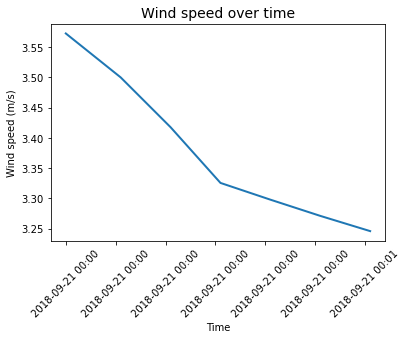

In [8]:
# Create plot of var_mean                                                                                                               
f, ax = plt.subplots(1,1)                                                                                                       
h = ax.plot(time, var_mean, lw=2)
ax.set_ylabel('Wind speed (m/s)')
ax.set_xlabel('Time') 
ax.set_title('Wind speed over time', fontsize=14) 
# Set date format
date_format = '%Y-%m-%d %H:%M'
myFmt = mdates.DateFormatter(date_format)                                                                                        
ax.xaxis.set_major_formatter(myFmt)
# Rotate ticks
plt.xticks(rotation=45);

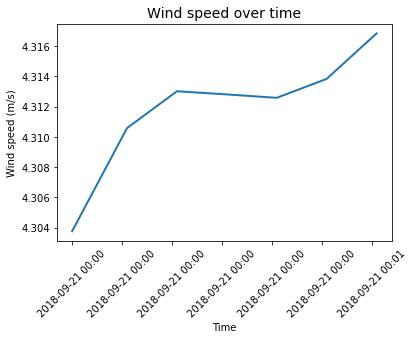

In [9]:
# Create plot of var_coord                                                                                                            
f, ax = plt.subplots(1,1)                                                                                                      
h = ax.plot(time, var_coord, lw=2)
ax.set_ylabel('Wind speed (m/s)')
ax.set_xlabel('Time') 
ax.set_title('Wind speed over time', fontsize=14) 
# Set date format
date_format = '%Y-%m-%d %H:%M'
myFmt = mdates.DateFormatter(date_format)                                                                                        
ax.xaxis.set_major_formatter(myFmt)
# Rotate ticks
plt.xticks(rotation=45);